<a href="https://colab.research.google.com/github/dtvyas24/AI_in_Finance/blob/master/Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install TFANN


  Created wheel for TFANN: filename=TFANN-1.0.1-cp36-none-any.whl size=7538 sha256=1a881630a5d86e0f48cc99ee02867a0027d92d5fe7ffee426b73361e09c5a9a7
  Stored in directory: /root/.cache/pip/wheels/3b/38/aa/a57c9b8bdeccf63d4a14ced9ab09a1b4cc4cb3b48fadecf906
Successfully built TFANN


In [0]:
import numpy as np


In [0]:
import matplotlib.pyplot as mpl


In [0]:
from sklearn.preprocessing import scale


In [0]:
from TFANN import ANNR


In [0]:
from google.colab import files

In [10]:
files.upload()

Saving TSLA (1).csv to TSLA (1).csv


{'TSLA (1).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300\n2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100\n2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800\n2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800\n2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900\n2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700\n2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400\n2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600\n2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500\n2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100\n2010-07-14,17.940001,20.150000,17.760000,19.840000,19.840000,4195200\n2010-07-15,19.940001,21.500000,19.000000,19.889999,19.889999,3739800\n2010-07-16,20.700001,21.299999,20.049999,20.639999,20.639999,2621300\n2010-07-19,21.370001,22.25

In [11]:
ls

 sample_data/  'TSLA (1).csv'


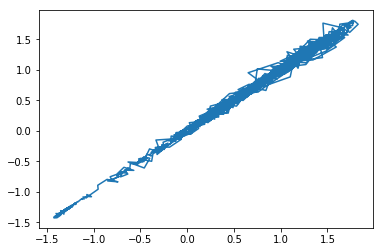

In [12]:
#reads data from the file and ceates a matrix with only the dates and the prices 
stock_data = np.loadtxt('TSLA (1).csv', delimiter=",", skiprows=1, usecols=(1, 4))
#scales the data to smaller values
stock_data=scale(stock_data)
#gets the price and dates from the matrix
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)
#creates a plot of the data and then displays it
mpl.plot(dates[:, 0], prices[:, 0])
mpl.show()

In [13]:
#Number of neurons in the input, output, and hidden layers
input = 1
output = 1
hidden = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params
mlpr = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)

W0814 16:53:23.838778 140464132831104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/TFANN.py:211: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0814 16:53:23.895904 140464132831104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/TFANN.py:212: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0814 16:53:23.897289 140464132831104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/TFANN.py:222: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 16:53:25.713102 140464132831104 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you 

In [14]:
#number of days for the hold-out period used to access progress
holdDays = 5
totalDays = len(dates)
#fit the model to the data "Learning"
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      2.28483592 (Batch Size:   256)
Iter     2	      1.96184292 (Batch Size:   256)
Iter     3	      1.55228251 (Batch Size:   256)
Iter     4	      1.33872771 (Batch Size:   256)
Iter     5	      1.06463777 (Batch Size:   256)
Iter     6	      0.84934644 (Batch Size:   256)
Iter     7	      0.66746383 (Batch Size:   256)
Iter     8	      0.51090538 (Batch Size:   256)
Iter     9	      0.39044417 (Batch Size:   256)
Iter    10	      0.29060455 (Batch Size:   256)
Iter    11	      0.21060003 (Batch Size:   256)
Iter    12	      0.14604543 (Batch Size:   256)


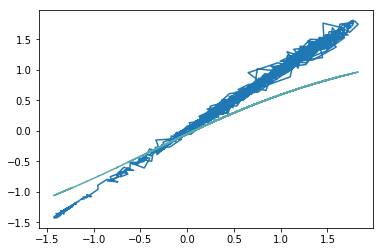

In [15]:
#Predict the stock price using the model
pricePredict = mlpr.predict(dates)
#Display the predicted reuslts agains the actual data
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.show()

In [0]:
#Number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 10000, tol = 0.1, reg = 1e-4, verbose = True)

In [18]:
holdDays = 5
totalDays = len(dates)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      2.28905553 (Batch Size:   256)
Iter     2	      1.92464594 (Batch Size:   256)
Iter     3	      1.63088160 (Batch Size:   256)
Iter     4	      1.40935013 (Batch Size:   256)
Iter     5	      1.14540527 (Batch Size:   256)
Iter     6	      0.98348176 (Batch Size:   256)
Iter     7	      0.80730644 (Batch Size:   256)
Iter     8	      0.62925003 (Batch Size:   256)
Iter     9	      0.51654439 (Batch Size:   256)
Iter    10	      0.41812256 (Batch Size:   256)
Iter    11	      0.30820404 (Batch Size:   256)
Iter    12	      0.23716693 (Batch Size:   256)
Iter    13	      0.17712287 (Batch Size:   256)
Iter    14	      0.12379699 (Batch Size:   256)
Iter    15	      0.08539210 (Batch Size:   256)


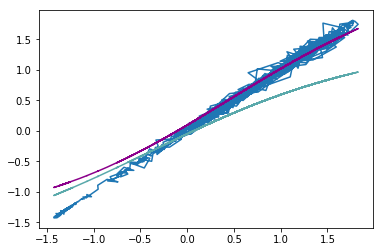

In [19]:
pricePredict2 = mlpr2.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.show()

In [0]:
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]

In [0]:
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'),('F', hidden), ('AF', 'tanh'), ('F', output)]

In [0]:
layers = [('F', 100), ('AF', 'tanh'), ('F', 50), ('AF', 'tanh'), ('F', 25), ('AF', 'tanh'), ('F', output)]